# Getting a simulation ready

In this tutorial we will go over some convenience functions for compiling SW4 input.

In [1]:
import os
import sys

import pySW4 as sw4
import obspy
import matplotlib.pyplot as plt
import numpy as np

## Source frequency and grid spacing
Source frequency, grid spacing, and minimum seismic propagation velocity in your domain are tied together by the following relation:

$$ppw = \frac{\lambda_{min}}{h} = \frac{V_{min}}{h \cdot f_{max}}$$

Note that $h$ needs to be made smaller to maintain the same value of $ppw$ if either $V_{min}$ is decreased or if $f_{max}$ is increased.

In [2]:
f_max = sw4.prep.source.f_max(300., 100.)
print('f_max = {}'.format(f_max))

f_max = 0.375


In [3]:
f0, freq = sw4.prep.source.source_frequency(f_max, stf='Liu')
print('f0 = {}\nfreq = {}'.format(f0, freq))

f0 = 0.09375
freq = 0.589048622548


In [4]:
t0 = sw4.prep.source.t0(freq)
print('t0 = {}'.format(t0))

t0 = 11.2045079937


In [5]:
vmin = sw4.prep.material_model.get_vmin(20., 5.)
print('vmin = {}'.format(vmin))

vmin = 800.0


In [6]:
h = sw4.prep.material_model.grid_spacing(800., 3.125)
print('h = {}'.format(h))

h = 32.0


### "Deploying your seismic network"
Here are some examples for various methods to place stations to record ground motion synthetics in your domain.

In [7]:
array = sw4.prep.stations.station_array(
    x1=0, x2=12000, y1=0, y2=12000, depth=100, number_of_stations=13,
    name='array', mode='velocity')
print(array)



# 13x13 array of seismograms added: array
rec x=0.000 y=0.000 depth=100.000 file=array_x=0.000_y=0.000_z=100.000_ writeEvery=100 nsew=0 variables=velocity
rec x=1000.000 y=0.000 depth=100.000 file=array_x=1000.000_y=0.000_z=100.000_ writeEvery=100 nsew=0 variables=velocity
rec x=2000.000 y=0.000 depth=100.000 file=array_x=2000.000_y=0.000_z=100.000_ writeEvery=100 nsew=0 variables=velocity
rec x=3000.000 y=0.000 depth=100.000 file=array_x=3000.000_y=0.000_z=100.000_ writeEvery=100 nsew=0 variables=velocity
rec x=4000.000 y=0.000 depth=100.000 file=array_x=4000.000_y=0.000_z=100.000_ writeEvery=100 nsew=0 variables=velocity
rec x=5000.000 y=0.000 depth=100.000 file=array_x=5000.000_y=0.000_z=100.000_ writeEvery=100 nsew=0 variables=velocity
rec x=6000.000 y=0.000 depth=100.000 file=array_x=6000.000_y=0.000_z=100.000_ writeEvery=100 nsew=0 variables=velocity
rec x=7000.000 y=0.000 depth=100.000 file=array_x=7000.000_y=0.000_z=100.000_ writeEvery=100 nsew=0 variables=velocity
rec x=8000

Placing stations from a StationXML file

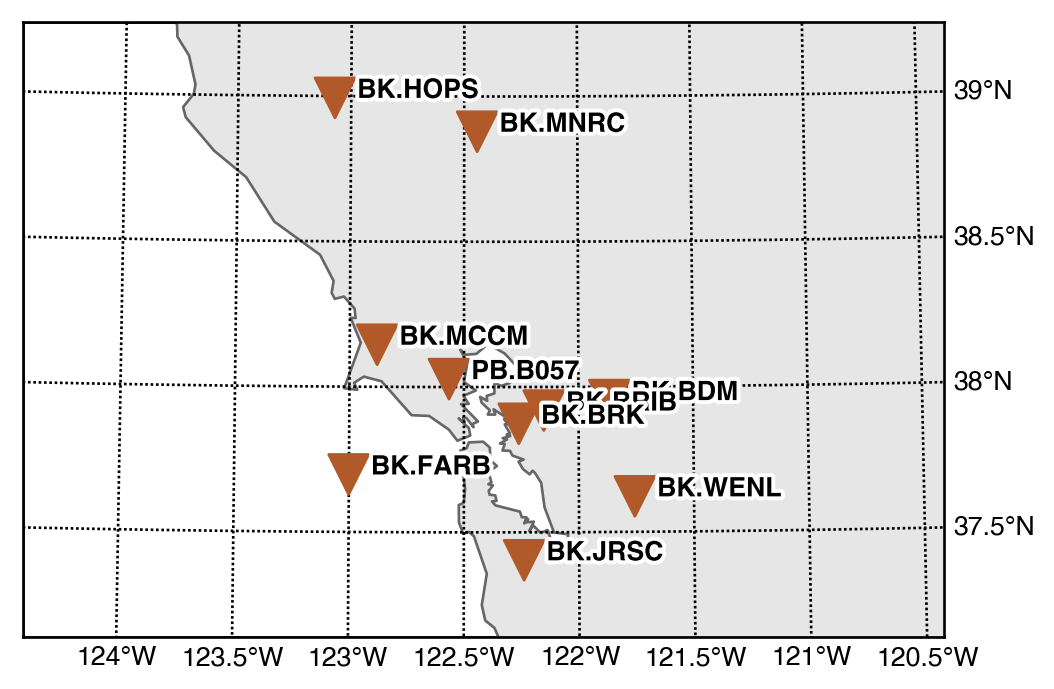



# stations at locations:
rec lon=-121.866 lat=37.954 depth=0 file=BK.BDM writeEvery=100 nsew=1 variables=velocity
rec lon=-122.152 lat=37.919 depth=0 file=BK.BRIB writeEvery=100 nsew=1 variables=velocity
rec lon=-122.261 lat=37.874 depth=0 file=BK.BRK writeEvery=100 nsew=1 variables=velocity
rec lon=-123.001 lat=37.698 depth=0 file=BK.FARB writeEvery=100 nsew=1 variables=velocity
rec lon=-123.072 lat=38.993 depth=0 file=BK.HOPS writeEvery=100 nsew=1 variables=velocity
rec lon=-122.239 lat=37.404 depth=0 file=BK.JRSC writeEvery=100 nsew=1 variables=velocity
rec lon=-122.880 lat=38.145 depth=0 file=BK.MCCM writeEvery=100 nsew=1 variables=velocity
rec lon=-122.443 lat=38.879 depth=0 file=BK.MNRC writeEvery=100 nsew=1 variables=velocity
rec lon=-121.757 lat=37.622 depth=0 file=BK.WENL writeEvery=100 nsew=1 variables=velocity
rec lon=-122.566 lat=38.027 depth=0 file=PB.B057 writeEvery=100 nsew=1 variables=velocity



In [8]:
inv = obspy.read_inventory('napa_stations.xml', 'STATIONXML')

inv.plot('local', 'i');
stations = sw4.prep.stations.inventory2station_locations(
    inv, mode='velocity', nsew=1)
print(stations)